# Problema de las 8 reinas

El problema de las 8 reinas consiste en un tablero de ajedrez en donde se colocan 8 piezas correspondientes a las reinas. Como es sabido, estas piezas pueden moverse en todas direcciones (arriba, abajo, a los lados, en diagonal). Al colocar a las reinas, éstas pueden estar o no amenazando a las otras reinas en el tablero. 

En algunos casos, se buscará que las reinas estén en tal configuración tal que todas se ataquen entre sí o bien que ninguna se ataque entre sí. Para configurar el problema usamos el siguiente código:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

class Board():
    """Problemas de las k reinas"""
    def __init__(self, size=8):
        #Tamaño del tablero
        self.size = size
        #Piezas en el tablero
        get_row = lambda size, shift: [{"type": (cell_index + shift) % 2, "piece": None} 
                                       for cell_index in range(size)]
        self.board = [get_row(self.size, _ % 2) for _ in range(self.size)]
        self.queen_board = np.zeros((size, size))
        
    def __str__(self):
        return str([[cell["type"] if cell["piece"]==None else cell["piece"] for cell in row] for row in self.board])

    def put(self, piece: str, cell: tuple) -> bool:
        """Coloca una pieza en una configuración del tablero"""
        row, column = cell
        self.board[row][column]['piece'] = piece
        
    def create_array(self):
        """Crea una matriz con la información del tablero"""
        self.queen_board = np.zeros((self.size, self.size))
        for i,row in enumerate(self.board):
            for j in range(self.size):
                if row[j]['piece'] == 'Q':
                    self.queen_board[i][j] = 1
                    
    def put_pieces(self, num=8, init='init', piece='Q'):
        """Coloca un número num de piezas en el tablero ya sea en configuración
        aleatoria o en alguna otra."""
        if init == 'random':
            elements = range(num)
            for i in elements:
                row, column = np.random.choice(elements), np.random.choice(elements)
                self.put(piece=piece, cell=(row,column))
        elif init == 'init':
            for pos in [(0,6),(1,4),(2,1),(3,3),(4,5),(5,7),(6,2),(7,0)][:num]:
                self.put(piece=piece, cell=pos)
        self.create_array()
                    
    def move(self, i,j):
        """Acción de mover una pieza"""
        s_p = self.board[i][j]
        if s_p['piece'] != 'Q':
            pass
        else:
            m,n = np.random.choice(range(self.size)), np.random.choice(range(self.size))
            s_q = self.board[m][n]
            if s_q['piece'] != 'Q':
                self.board[i][j]['piece'] = None
                self.queen_board[i][j] = 0
                self.board[m][n]['piece'] = 'Q'
                self.queen_board[m][n] = 1
                #self.create_array()
            else:
                self.move(i,j)
    
    def draw(self):
        """Dibuja el tablero"""
        img_board = np.array([[cell["type"] if cell["piece"]==None else 0.5 for cell in row] for row in self.board])
        plt.imshow(img_board, cmap='Greys')
        plt.axis('off')
        plt.show()

Podemos visualizar cómo se comporta la simulación del problema que se ha programado. Colocamos las 8 piezas en una configuración predeterminada.

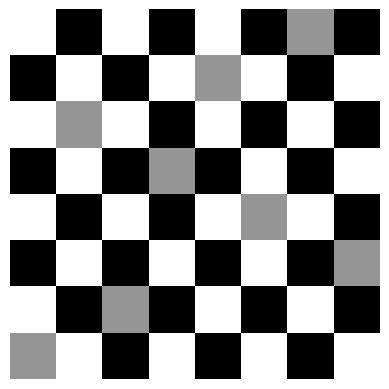

In [2]:
queens = Board()
queens.put_pieces(num=8)
queens.draw()